In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:

def f(t,y):
    # definition of RHS for the 2D gravity ODE
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    dy[2] = -y[0]/(y[0]**2 + y[1]**2)
    dy[3] = -y[1]/(y[0]**2 + y[1]**2)
    return dy


/var/folders/2x/bgd6yyyn4h71rbjgwy7c22tr0000gn/T/ipykernel_87872/2343097535.py:6: RuntimeWarning: invalid value encountered in double_scalars
  dy[2] = -y[0]/(y[0]**2 + y[1]**2)
/var/folders/2x/bgd6yyyn4h71rbjgwy7c22tr0000gn/T/ipykernel_87872/2343097535.py:7: RuntimeWarning: invalid value encountered in double_scalars
  dy[3] = -y[1]/(y[0]**2 + y[1]**2)


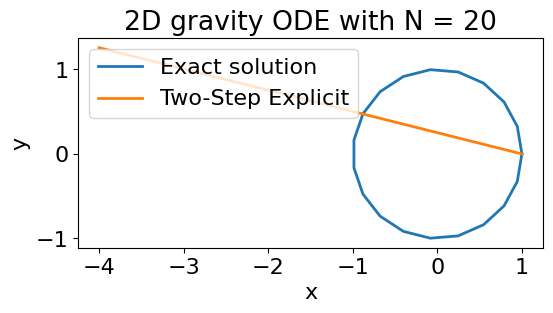

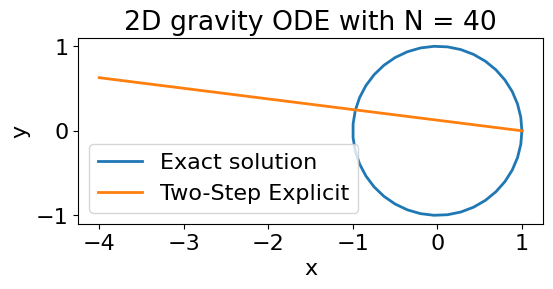

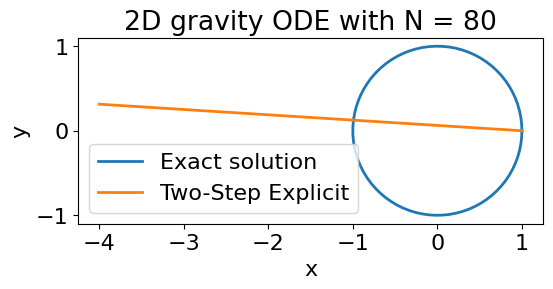

In [4]:

numSteps = [20, 40, 80]
y0 = np.array([1,0,0,1])
numLoops = 4
tt = np.linspace(0,2*np.pi,200)
for n in numSteps:

    h = 2*np.pi/n 
    iters = numLoops*n
    # two-step explicit method 
    u = np.zeros((iters+1, 4))
    u[0,:] = y0
    t = 0
    for i in range(iters):
        u[i+1,:] = -4*u[i,:] + 5*u[i-1,:] + h*(4*f(t, u[i,:]) +2*f(t-h,u[i-1,:]))
        t += h
    # print(f"Two-step Explicit Method with N = {n}:")

    # solNorm = np.linalg.norm(u[4*np.pi,:])
    # print(f"Solution Norm: {solNorm}")

    tt = np.linspace(0,2*np.pi,n)
    plt.rcParams.update({'font.size': 16})
    fig, ax = plt.subplots(figsize=(6,6))
    plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
    plt.plot(u[:,0],u[:,1],linewidth=2,label='Two-Step Explicit')  
    plt.title(f"2D gravity ODE with N = {n}")
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("y")
    ax.set_aspect(1)
    
